# Mathematical programming with Jupyter Notebooks
# Valid inequalities

*Copyright 2016, Pedro Belin Castellucci & Franklina Maria Bragion de Toledo, All rights reserved.*

*This Notebook is licenced under GLPv3 (https://opensource.org/licenses/GPL-3.0).*

In this Notebook, we will talk about valid inequalities for integer programs.

Consider the following problem:


$$\textrm{Min}\ c^t x$$

$$s. t. \ Ax \leq b$$ 

$$x \in \mathbb{Z}^n.$$


Constraints $Ax \leq b$, $x \in \mathbb{Z}^n$, define a region $X \subseteq \mathbb{R}^n$. If $\pi x \leq \pi_0$ for all $x \in X$ then $\pi x \leq \pi_0$ is a __valid inequality__ for $X \subseteq \mathbb{R}^n$.

In order to get a more geometrical view of this concept let us build an example using the Notebook tools. First, let us import some packages:

In [2]:
# numpy for scientifical computing:
import numpy as np

#matplotbib for drawing
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from IPython.display import display

For the problem defined, we will consider the following data and assume $x \geq 0$:

In [3]:
A = np.matrix('1 2; 2 1')
b = np.matrix('7  ; 7')
c = np.matrix('-2.0 -3.0')

Now, we will define the boundaries of the feasible region:

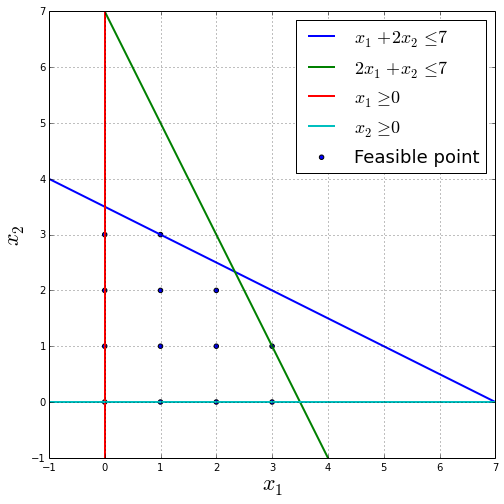

In [6]:
# create the plot object:
fig, ax = plt.subplots(figsize=(8, 8))
s = np.linspace(-1, 7)

# add the first constraint: x_1 + 2x_2 <= 7
ax.plot(s, (b[0,0]-A[0,0]*s)/A[0,1], lw=2, label='$x_1 + 2x_2 \leq 7$')

# add the second constraint: 2x_1 + x_2 ≤ 7
ax.plot(s, (b[1,0] - A[1,0]*s)/A[1,1], lw=2, label='$2x_1 + x_2 \leq 7$')

# add the non-negativity constraints:
ax.plot(np.zeros_like(s), s, lw=2, label='$x_1 \geq 0$')
ax.plot(s, np.zeros_like(s), lw=2, label='$x_2 \geq 0$')

# labels and stuff:
ax.legend(fontsize=18)

plt.xlabel('$x_1$', fontsize=22)
plt.ylabel('$x_2$', fontsize=22)
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()

# In order to plot the feasible point we need upper bound for x1 and x2:
x1Upper, x2Upper = 5, 5

s1 = range(0, x1Upper + 1)
s2 = range(0, x2Upper + 1)

x1ToPlot, x2ToPlot = [], []
for x1 in s1:
    for x2 in s2:
        # Now we check if point (x1, x2) respects constraints Ax <= b:
        if x1 + 2*x2 <= 7.0 and 2*x1 + x2 <= 7.0:
            x1ToPlot.append(x1)
            x2ToPlot.append(x2)

ax.scatter(x1ToPlot, x2ToPlot, label="Feasible point")
ax.legend(scatterpoints=1, fontsize=18)

# display(fig)

We will analyse two inequalities, the first one is:

$2x_1 + 2x_2 \leq 9$.

Let's plot it.

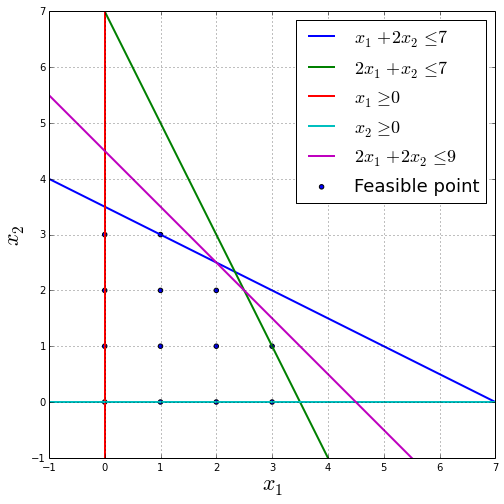

In [7]:
s = np.linspace(-1, 7)

# Adding the new line
c1 = ax.plot(s, (9 - 2*s)/2.0, lw=2, label='$2x_1 + 2x_2 \leq 9$')
ax.legend(fontsize=18, scatterpoints=1)


display(fig)
c1.pop(0).remove()

We can see from the plot that every feasible point $(x_1, x_2)$ also respects the inequality $2x_1 + 2x_2 \leq 9$. Therefore $2x_1 + 2x_2 \leq 9$ is a valid inequality for the problem.

Another inequality we will look at is:

$2x_1 - 2x_2 \geq 5$.

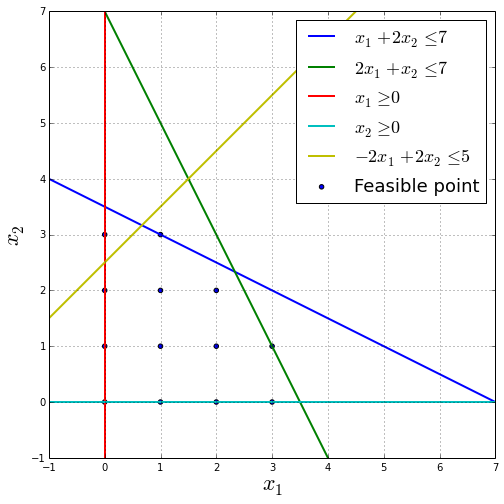

In [13]:
s = np.linspace(-1, 7)

# Adding the new line
c1 = ax.plot(s, (5 + 2*s)/2.0, lw=2, label='$-2x_1 + 2x_2 \leq 5$')

ax.legend(fontsize=18, scatterpoints=1)

display(fig)
c1.pop(0).remove()

Now we can see that the point $(x_1, x_2) = (0, 3)$, which is feasible in the original problem, does not satisfy the inequality $-2x_1 + 2x_2 \leq 5$. Therefore, $-2x_1 + 2x_2 \leq 5$ is not a valid inequality for the problem.

It is your turn to analyse some inequalities for this problem:
1. $x_2 \leq 3$;
2. $x_1 + x_2 \leq 5$;
3. $4x_1 - x_2 \leq 9$.

Are they valid inequalities? (You can go back and change the inequalites from previous cells).

# The importance of valid inequalities

In theory, we can reformulate any integer programming

$\textrm{Min} \ c^t x$

s. t. 

$Ax \leq b$,

$x \in \mathbb{Z}_+^n$,

using its convex hull, which yields a linear program of the form:

$\textrm{Min} \ c^t x$

s. t. 

$\tilde{A}x \leq \tilde{b}$,

$x \geq 0$.

Then, an optimal solution of the linear program in an extreme point of the convex hull is an optimal solution of the integer program. However, for NP-hard problems, a way to describe the convex hull using a reasonable number of constraints is not known. Even so, the importance of valid inequalities is that they can be a tool to make a formulation "closer" to its convex hull.

As an example of how valid inequalities can help in the solution of a problem, we will use PuLP/Gurobi to solve ours:

In [3]:
import pulp
model = pulp.LpProblem('Example', pulp.LpMinimize)
x1 = pulp.LpVariable('x1', lowBound=0, cat='Integer')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Integer')

model += -2*x1 - 3*x2  # Objective function

model += x1 + 2*x2 <= 7
model += 2*x1 + x2 <= 7

# model += 2*x1 + 2*x2 <= 9  # This is one of the valid inequalities we analysed.

# Let's turn off some of the features of Gurobi:
model.solve(pulp.solvers.GUROBI(msg=True, Heuristics=0,
                                Cuts=0, Method=0, NodeMethod=0,
                                BranchDir=-1)
           )
print ("x1 = %d, x2 = %d" % (x1.value(), x2.value()))

Parameter Heuristics unchanged
   Value: 0.0  Min: 0.0  Max: 1.0  Default: 0.05
Parameter BranchDir unchanged
   Value: -1  Min: -1  Max: 1  Default: 0
Parameter NodeMethod unchanged
   Value: 0  Min: 0  Max: 2  Default: 1
Parameter Method unchanged
   Value: 0  Min: -1  Max: 4  Default: -1
Parameter Cuts unchanged
   Value: 0  Min: -1  Max: 3  Default: -1
Optimize a model with 2 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 2e+00]
  Objective range [2e+00, 3e+00]
  Bounds range    [0e+00, 0e+00]
  RHS range       [7e+00, 7e+00]
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)

Root relaxation: objective -1.166667e+01, 2 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  -11.66667    0    2          -  -11.66667      -     -    0s
     0     2  -11.66

Now, we can add some valid inequalities to the model and solve it again. Note how and which valid inequalities affect the computational effort needed to solve the problem.

In practice, it is possible to use valid inequalities to stregthen the formulation *a priori* or in automatic reformulation algorithms (cutting plane algorithms). In the *a priori* approach, the idea is to include "good" valid inequalities $Qx \leq b'$, in a formulation $Ax \leq b$, resulting in a stronger formulation. Then, any optimisation software may be used to solve the problem at hand. It is expected that the stronger model will give better bounds for the optimal solution and require less computation effort to find feasible solutions. On the other hand, the number of valid inequalites to be added may result in big linear problems to be solved, which a software may not be able to handle properly. The cutting plane algorithm approach tries to attenuate this disadvantage.